In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as ss 
import statsmodels.stats.power as smp
from statsmodels.stats.power import tt_ind_solve_power
import scipy.stats as ss
import numpy as np

In [14]:
path = 'C:/Users/ivana/Desktop/tabla_trabajo_final.csv'
datos_pdb_nan = pd.read_csv(path,sep=',') #se cargo la tabla
datos_pdb_nan.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0


In [15]:
datos_pdb.describe() #resumen descriptivo de la tabla, cantidad de datos numerico, promedio, desvio standar,valor minimo-max, cuatilos. Como se distribuye los datosnumericos de la tabla 

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
count,2397.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2336.000000,2069.000000,2336.000000,2336.000000,2336.000000,2336.000000,2397.000000,2397.000000,2397.00000
mean,9.468919,8.585616,16.546522,13.009426,10.145120,13.905734,0.307328,4.600599,7.418224,29.337625,3.433206,6.950771,0.090817,6.160103,14.815603,18.597413,1.53567
std,8.807886,6.284302,15.008828,11.534076,6.351037,12.145036,0.803676,4.526220,21.870741,128.084665,21.580814,10.210784,0.107791,5.520145,6.206602,18.520580,0.49883
min,0.000000,1.000000,2.636364,2.125000,0.000000,2.111111,-0.040698,1.000000,-47.481535,-4608.037502,-69.481535,-166.000000,-0.020349,-24.000000,4.000000,5.000000,1.00000
25%,3.000000,4.000000,6.117647,5.482069,6.000000,5.571429,0.091938,1.000000,2.655810,8.907313,0.521316,3.000000,0.026786,3.000000,10.000000,11.000000,1.00000
50%,7.000000,7.000000,7.732143,6.312500,9.000000,6.753378,0.154744,3.000000,5.372176,16.305071,1.379049,6.000000,0.056499,5.000000,14.000000,15.000000,2.00000
75%,14.000000,12.000000,23.377404,18.333333,13.000000,19.620629,0.263229,7.000000,9.016228,32.808022,3.353218,9.000000,0.111471,9.000000,18.000000,20.000000,2.00000
max,49.000000,48.000000,124.300000,98.600000,50.000000,98.666667,16.129630,43.000000,785.487402,1624.952729,783.487402,115.000000,1.008814,44.000000,56.000000,506.000000,2.00000


In [16]:
datos_pdb.shape #cantidad de filas y columnas

(2397, 17)

In [17]:
print(datos_pdb.groupby('flag').size()) #saber N de cada flag, porque despues se debe igual el N


flag
1.0    1113
2.0    1284
dtype: int64


In [18]:
datos_pdb.isna().sum() #numero nan por filas, numeros faltantes

Unnamed: 0                0
tiempo_maximo            61
intensidad_maxima        61
intensidad_minima        61
tiempo_valle             61
intensidad_valle         61
sparks_amplitud          61
TTP                      61
sparks_tiempo_pico50     61
sp_tau                  328
TTP50                    61
fullWidth                61
(ΔF/F0)/ΔTmax            61
fullDuration             61
width                     0
high                      0
flag                      0
dtype: int64

In [19]:
nan_por_fila = datos_pdb.isna().sum(axis=1)
filas_a_eliminar = datos_pdb[nan_por_fila > 5]
#filas_eliminar.head()
eliminadas = datos_pdb[nan_por_fila > 5].copy()

In [20]:
datos_pdb = datos_pdb.drop(filas_a_eliminar.index)

In [21]:
datos_pdb.isna().sum() #calcular la suma de los valores nam en cada columna del DataFrame "datos_pdb", con la función isna() devuelve un DataFrame. Luego, al aplicar el método sum(), se calcula la cantidad de valores nulos en cada una de ellas.

Unnamed: 0                0
tiempo_maximo             0
intensidad_maxima         0
intensidad_minima         0
tiempo_valle              0
intensidad_valle          0
sparks_amplitud           0
TTP                       0
sparks_tiempo_pico50      0
sp_tau                  267
TTP50                     0
fullWidth                 0
(ΔF/F0)/ΔTmax             0
fullDuration              0
width                     0
high                      0
flag                      0
dtype: int64

In [23]:
datos_pdb_flag1 = datos_pdb[datos_pdb["flag"] == 1] #filtrar datos, dos grupos flag 1 y flag 2
datos_pdb_flag2 = datos_pdb[datos_pdb["flag"] == 2]
datos_pdb_flag1

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
25,25,6.0,12.142857,9.761905,7.0,9.095238,0.243902,2.0,4.757271,3.460326,0.757271,6.0,0.121951,3.0,16.0,21.0,1.0
27,27,2.0,11.769231,9.846154,5.0,9.384615,0.195312,2.0,0.963789,14.896859,0.963789,4.0,0.097656,5.0,8.0,13.0,1.0
28,28,2.0,11.909091,9.727273,5.0,10.000000,0.224299,1.0,1.525253,21.036657,0.525253,2.0,0.224299,4.0,7.0,11.0,1.0
29,29,24.0,10.104167,7.927083,25.0,9.312500,0.274639,6.0,21.222022,12.256359,3.222022,9.0,0.045773,7.0,28.0,96.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,15,5.0,38.416667,32.416667,6.0,29.083333,0.185090,3.0,3.879266,3.592907,1.879266,8.0,0.061697,4.0,13.0,12.0,1.0
2374,3,8.0,34.000000,26.625000,9.0,28.750000,0.276995,4.0,6.921071,5.962220,2.921071,2.0,0.069249,5.0,15.0,8.0,1.0
2392,21,9.0,5.241379,4.551724,13.0,4.793103,0.151515,4.0,7.439495,60.598769,2.439495,14.0,0.037879,8.0,16.0,29.0,1.0
2394,23,3.0,5.700000,4.200000,10.0,4.500000,0.357143,3.0,1.344157,32.501493,1.344157,-1.0,0.119048,10.0,14.0,10.0,1.0


In [24]:
datos_pdb_flag2

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0
5,5,4.0,8.090909,7.727273,5.0,7.727273,0.047059,2.0,3.344829,21.746168,1.344829,4.0,0.023529,3.0,8.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2389,18,6.0,6.285714,4.428571,8.0,4.642857,0.419355,1.0,5.543553,6.601759,0.543553,5.0,0.419355,3.0,13.0,14.0,2.0
2390,19,12.0,6.823529,4.588235,15.0,4.411765,0.487179,8.0,10.439551,7.762134,6.439551,3.0,0.060897,11.0,25.0,17.0,2.0
2391,20,12.0,29.600000,25.450000,13.0,25.150000,0.163065,4.0,10.428034,6.138115,2.428034,8.0,0.040766,5.0,14.0,20.0,2.0
2393,22,8.0,5.526316,4.684211,10.0,4.736842,0.179775,5.0,5.813139,12.974318,2.813139,9.0,0.035955,7.0,15.0,19.0,2.0


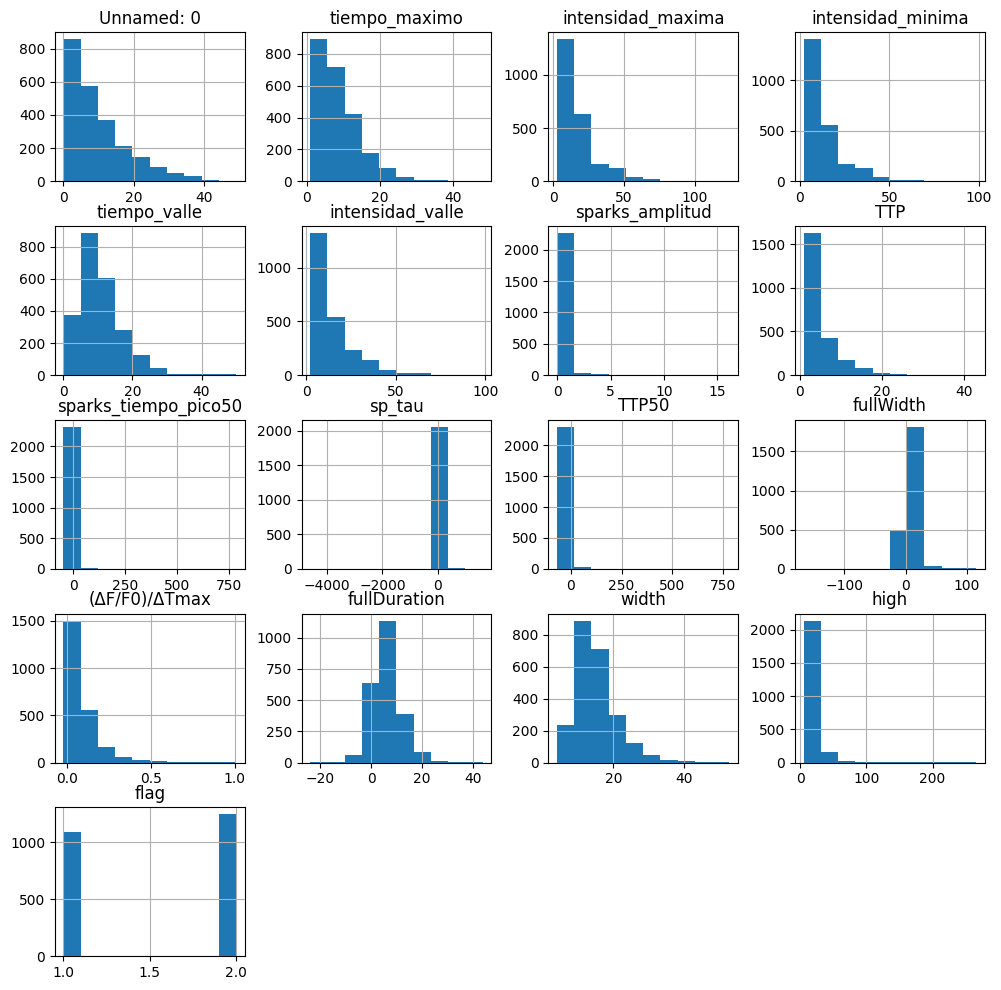

In [25]:
datos_pdb.hist(figsize=(12,12)) #histogramas para visualizar la distribucion de los datos decada variable
plt.show()

(array([[145., 369., 335., 159.,  65.,  12.,   4.,   0.,   1.,   0.],
        [232., 516., 271., 120.,  59.,  29.,   5.,   7.,   3.,   4.]]),
 array([ 0.,  5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]),
 <a list of 2 BarContainer objects>)

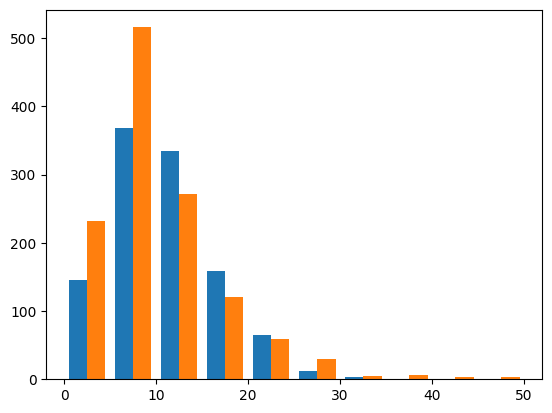

In [26]:
plt.hist([datos_pdb_flag1["tiempo_valle"], datos_pdb_flag2["tiempo_valle"]]) #graficar los datos para la variable tiempovalle de los dos grupos flag 1 y flag 2 

(array([[631., 259., 105.,  63.,  14.,   9.,   9.,   0.,   0.,   0.],
        [690., 285., 131.,  81.,  34.,  12.,   6.,   4.,   0.,   3.]]),
 array([ 2.11111111, 11.76666667, 21.42222222, 31.07777778, 40.73333333,
        50.38888889, 60.04444444, 69.7       , 79.35555556, 89.01111111,
        98.66666667]),
 <a list of 2 BarContainer objects>)

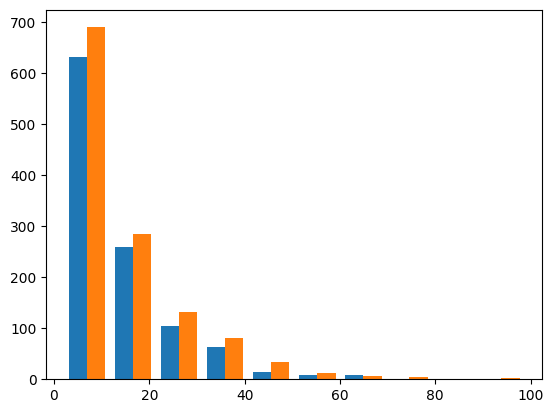

In [27]:
plt.hist([datos_pdb_flag1["intensidad_valle"], datos_pdb_flag2["intensidad_valle"]])

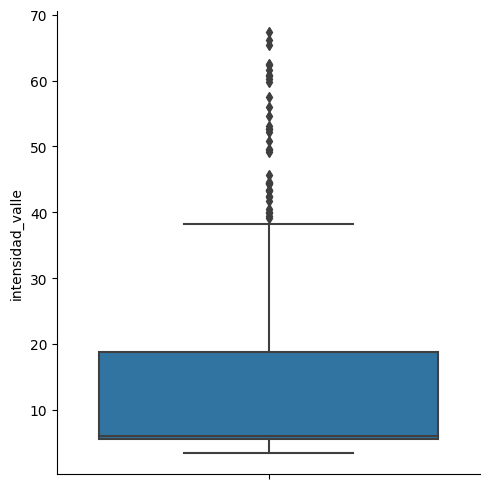

In [28]:
sns.catplot(x=None, y="intensidad_valle", kind="box", data=datos_pdb_flag1)

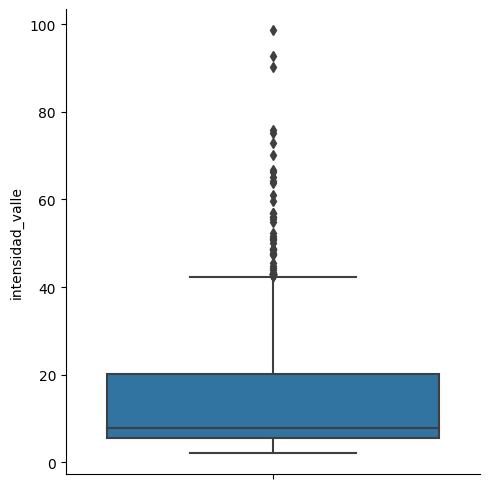

In [29]:
sns.catplot(x=None, y="intensidad_valle", kind="box", data=datos_pdb_flag2)

In [30]:
Q1 = datos_pdb_flag1["intensidad_valle"].quantile(0.05) #ver que criterios tener para eliminar los outliers, uno seria calculando los cuartilos, se crea un nuevo dataframe
Q3 = datos_pdb_flag1["intensidad_valle"].quantile(0.95)
IQR = Q3 - Q1
df_sin_outliers = datos_pdb_flag1[(datos_pdb_flag1["intensidad_valle"] >= Q1 - 1.5 * IQR) & (datos_pdb_flag1["intensidad_valle"] <= Q3 + 1.5 * IQR)]
df_sin_outliers.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
2,2,3.0,7.230769,6.884615,4.0,6.615385,0.050279,1.0,2.506131,11.242589,0.506131,18.0,0.050279,2.0,12.0,26.0,1.0
25,25,6.0,12.142857,9.761905,7.0,9.095238,0.243902,2.0,4.757271,3.460326,0.757271,6.0,0.121951,3.0,16.0,21.0,1.0
27,27,2.0,11.769231,9.846154,5.0,9.384615,0.195312,2.0,0.963789,14.896859,0.963789,4.0,0.097656,5.0,8.0,13.0,1.0
28,28,2.0,11.909091,9.727273,5.0,10.000000,0.224299,1.0,1.525253,21.036657,0.525253,2.0,0.224299,4.0,7.0,11.0,1.0
29,29,24.0,10.104167,7.927083,25.0,9.312500,0.274639,6.0,21.222022,12.256359,3.222022,9.0,0.045773,7.0,28.0,96.0,1.0


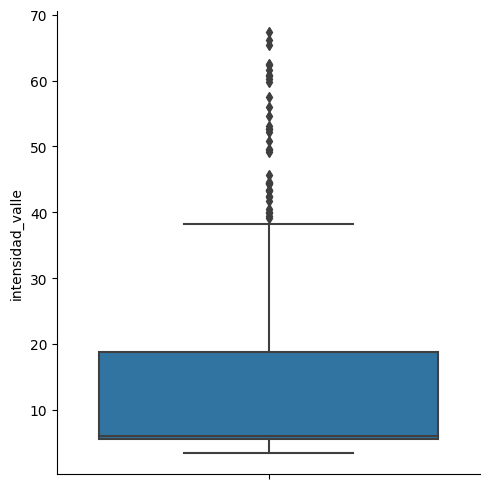

In [31]:
sns.catplot(x=None, y="intensidad_valle", kind="box", data = df_sin_outliers) #volver a graficar 

In [32]:
datos_pdb_flag1.shape

(1090, 17)

In [33]:
df_sin_outliers.shape

(1090, 17)

In [34]:
Q1 = datos_pdb_flag2["intensidad_valle"].quantile(0.05)
Q3 = datos_pdb_flag2["intensidad_valle"].quantile(0.95)
IQR = Q3 - Q1
df_sin_outliers2 = datos_pdb_flag2[(datos_pdb_flag2["intensidad_valle"] >= Q1 - 1.5 * IQR) & (datos_pdb_flag2["intensidad_valle"] <= Q3 + 1.5 * IQR)]
df_sin_outliers2.head()

,Unnamed: 0,tiempo_maximo,intensidad_maxima,intensidad_minima,tiempo_valle,intensidad_valle,sparks_amplitud,TTP,sparks_tiempo_pico50,sp_tau,TTP50,fullWidth,(ΔF/F0)/ΔTmax,fullDuration,width,high,flag
0,0,13.0,10.925926,7.740741,23.0,7.666667,0.411483,8.0,9.482171,32.285667,4.482171,11.0,0.051435,18.0,25.0,27.0,2.0
1,1,4.0,10.941176,8.117647,7.0,7.764706,0.347826,2.0,3.206613,9.208165,1.206613,12.0,0.173913,5.0,12.0,17.0,2.0
3,3,15.0,10.363636,7.454545,0.0,9.636364,0.390244,14.0,12.507874,NaN,11.507874,2.0,0.027875,-1.0,17.0,11.0,2.0
4,4,24.0,10.689655,7.931034,26.0,8.229885,0.347826,13.0,19.740930,7.648054,8.740930,25.0,0.026756,15.0,41.0,87.0,2.0
5,5,4.0,8.090909,7.727273,5.0,7.727273,0.047059,2.0,3.344829,21.746168,1.344829,4.0,0.023529,3.0,8.0,11.0,2.0


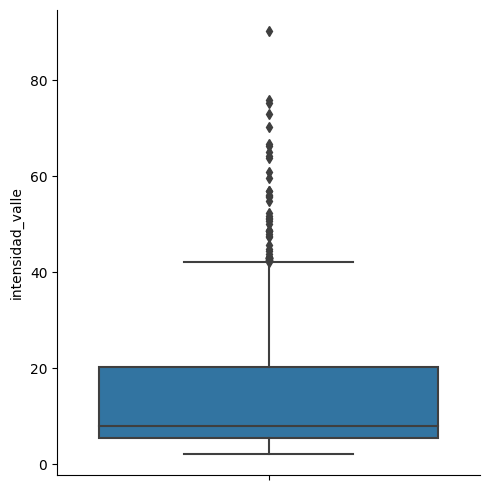

In [35]:
sns.catplot(x=None, y="intensidad_valle", kind="box", data = df_sin_outliers2)

In [36]:
datos_pdb_flag2.shape

(1246, 17)

In [37]:
df_sin_outliers2.shape

(1244, 17)

In [38]:
df_sin_outliers["intensidad_valle"].describe()

count    1090.000000
mean       13.205630
std        11.233249
min         3.473684
25%         5.647059
50%         6.097619
75%        18.767045
max        67.423077
Name: intensidad_valle, dtype: float64

In [39]:
df_sin_outliers2["intensidad_valle"].describe()

count    1244.000000
mean       14.387605
std        12.453200
min         2.111111
25%         5.473684
50%         7.885621
75%        20.152597
max        90.200000
Name: intensidad_valle, dtype: float64

In [40]:
ss.shapiro(df_sin_outliers['intensidad_valle']) #test de distribucion 

ShapiroResult(statistic=0.7614481449127197, pvalue=5.28518795899995e-37)

In [41]:
print(df_sin_outliers.shape)
print(df_sin_outliers2.shape)

(1090, 17)
(1244, 17)


In [42]:
df_sin_outliers_ = df_sin_outliers2.sample(1090)
#df_sin_outliers es la variable df_sin_outliers_2 reducida del n total para poder hacer el test
print(df_sin_outliers_.shape)

(1090, 17)


In [43]:
#ss.wilcoxon(df_sin_outliers['intensidad_valle'], df_sin_outliers_['intensidad_valle'], zero_method='wilcox', correction=False, alternative='two-sided', method='auto', axis=0, nan_policy='propagate', keepdims = False)

In [44]:
#contraste de hipotesis
ss.mannwhitneyu( df_sin_outliers['intensidad_valle'],  df_sin_outliers2['intensidad_valle'], use_continuity=True, alternative='two-sided', axis=0, method='auto', nan_policy='propagate', keepdims=False)
#no hay suficiente evidencia estadística para afirmar que las medianas de los dos grupos son diferentes

MannwhitneyuResult(statistic=649007.0, pvalue=0.07447910430857446)

La prueba de Mann-Whitney, también conocida como U de Mann-Whitney, es una prueba no paramétrica utilizada para determinar si hay diferencias significativas entre las medianas de dos grupos independientes. La hipótesis nula establece que no hay diferencia en las distribuciones de los dos grupos, mientras que la hipótesis alternativa sostiene que hay una diferencia significativa.
En general, un valor p menor que un nivel de significancia predefinido (como 0.05) indica que hay suficiente evidencia para rechazar la hipótesis nula y concluir que hay una diferencia significativa entre las medianas de los dos grupos. Sin embargo, en este caso, dado que el valor p es mayor que 0.05, se considera marginalemente significativo, lo que significa que la evidencia para rechazar la hipótesis nula es débil o marginal. En otras palabras, no hay suficiente evidencia estadística para afirmar que las medianas de los dos grupos son diferentes.

In [66]:
n = tt_ind_solve_power(effect_size=0.5 , alpha=0.05, power=0.8, alternative='two-sided')
n = int(round(n))  # Ajustar el tamaño muestral a un número entero
print("El tamaño muestral necesario es:", n)

El tamaño muestral necesario es: 64


In [68]:
sample_size = smp.tt_ind_solve_power(effect_size=0.5, alpha = 0.05, power=0.8)
print("El tamanio muestral es: ", int(sample_size))

El tamanio muestral es:  63


In [ ]:
#tabla de contingencia
import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df['col1'] > 0.27)
b = (df['col2'] > 4.41) 

# Create a contingency table using groupby
contingency_table = df.groupby([a, b])['flag'].count()#.unstack(fill_value=0) #se supone que  con unstack me deberia dar una tabla de 2*2

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
p

In [53]:
import numpy as np
from scipy import stats 
#calcular intervalo de confianza
confidence_level = 0.95
confidence_intervals = {}

#se creo las dos poblaciones  segun la columna flag
datos_pdb_flag1 = datos_pdb[datos_pdb["flag"] == 1]
datos_pdb_flag2 = datos_pdb[datos_pdb["flag"] == 2]

for columna in datos_pdb.columns:
    if columna == 'flag':
        continue
    
    mean1 = np.mean(datos_pdb_flag1) #intervalo para flag1
    n1 = len(datos_pdb_flag1)
    std_error1 = np.std(datos_pdb_flag1, ddof=1) / np.sqrt(n1)
    margin_of_error1 = std_error1 * stats.t.ppf((1 + confidence_level) / 2, n1 - 1)
    confidence_interval_1 = (mean1 - margin_of_error1, mean1 + margin_of_error1)
    
    mean2 = np.mean(datos_pdb_flag2) #intervalo para flag2
    n2 = len(datos_pdb_flag2)
    std_error2 = np.std(datos_pdb_flag2, ddof=1) / np.sqrt(n2)
    margin_of_error2 = std_error2 * stats.t.ppf((1 + confidence_level) / 2, n2 - 1)
    confidence_interval_2 = (mean2 - margin_of_error2, mean2 + margin_of_error2)
    
    confidence_intervals[columna] = (confidence_interval_1, confidence_interval_2)
    print(confidence_intervals) 
    # l resultado que has proporcionado muestra el diccionario confidence_intervals con los intervalos de confianza para cada columna en datos_pdb. Los intervalos de confianza se presentan en forma de pares, donde el primer valor corresponde al intervalo para flag = 1 y el segundo valor corresponde al intervalo para flag = 2.
    

{'Unnamed: 0': ((Unnamed: 0              9.322867
tiempo_maximo           9.424237
intensidad_maxima       8.935046
intensidad_minima       9.123694
tiempo_valle            9.422312
intensidad_valle        9.096558
sparks_amplitud         9.733596
TTP                     9.513398
sparks_tiempo_pico50    7.947574
sp_tau                  4.144270
TTP50                   7.951698
fullWidth               9.367262
(ΔF/F0)/ΔTmax           9.759618
fullDuration            9.443164
width                   9.469129
high                    9.267688
flag                    9.764168
dtype: float64, Unnamed: 0              10.205469
tiempo_maximo           10.104099
intensidad_maxima       10.593290
intensidad_minima       10.404643
tiempo_valle            10.106024
intensidad_valle        10.431779
sparks_amplitud          9.794740
TTP                     10.014939
sparks_tiempo_pico50    11.580763
sp_tau                  15.384066
TTP50                   11.576639
fullWidth               10.16107

In [69]:
#tamaño de la muestra ttest
sample_size = smp.tt_ind_solve_power(effect_size=0.5, alpha = 0.05, power=0.8)#alpha nivel de significancia, power potencia, effect size tamaño del efecto
print("Required sample size:", int(sample_size))

Required sample size: 63


In [97]:
#variables categoricas
# Datos
data = datos_pdb["sparks_tiempo_pico50"]

# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_sparks_tiempo_pico50")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_sparks_tiempo_pico50")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_sparks_tiempo_pico50")
    else:
        categories.append("Q4_sparks_tiempo_pico50")

# Imprime las categorías resultantes
print(categories)

['Q4_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q2_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q4_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 'Q1_sparks_tiempo_pico50', 'Q3_sparks_tiempo_pico50', 

In [96]:
#variables categoricas
# Datos
data = datos_pdb["TTP50"]

# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_TTP50")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_TTP50")
    elif value <=np.percentile(data, 75):
        categories.append("Q3_TTP50")
    else:
        categories.append("Q4_TTP50")

# Imprime las categorías resultantes
print(categories)

['Q4_TTP50', 'Q2_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q4_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q4_TTP50', 'Q1_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q1_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q1_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q4_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q1_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q4_TTP50', 'Q4_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q4_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q1_TTP50', 'Q3_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q3_TTP50', 'Q1_TTP50', 'Q4_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q1_TTP50', 'Q1_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q2_TTP50', 'Q3_TTP50', 'Q2_TTP50', 'Q4_TTP50', 'Q4_TTP50', 'Q4

In [70]:
from scipy.stats import pearsonr

In [90]:
X = datos_pdb["sparks_tiempo_pico50"]
Y = datos_pdb["TTP50"]
correlation, p_value = pearsonr(X, Y) #test de correlacion 
print("Coeficiente de correlación de Pearson:", correlation)
print("Valor p:", p_value)

Coeficiente de correlación de Pearson: 0.9812800712143517
Valor p: 0.0


In [ ]:
tab = pd.DataFrame(df, index=['tiempo_maximo', 'intensidad_maxima', 'intensidad_minima', 
                               'tiempo_valle', 'intensidad_valle','sparks_amplitud','TTP',
                               'sparks_tiempo_pico50','sp_tau','TTP50','fullWidth','(ΔF/F0)/ΔTmax',
                               'fullDuration','width','high','flag'])

# Definir los parámetros
nivel_confianza = 0.95

# Crear una instancia de la clase TTestIndPower
ttp = TTestIndPower()

# Crear una lista para almacenar los tamaños muestrales
tamanios_muestrales = []

# Recorrer las columnas del DataFrame original
for columna in tab.columns:
    # Obtener los valores de la columna y la última columna (flag)
    valores = tab[columna]
    poblacion = tab['flag']
    
    # Filtrar los valores para cada población
    poblacion_1 = valores[poblacion == 1]
    poblacion_2 = valores[poblacion == 2]
    mean1 = np.mean(poblacion1)
    mean2 = np.mean(poblacion2)
    #margen de eror dentro de cada una diferencia de medias
    # Calcular el tamaño muestral para cada población utilizando statsmodels
    tamanio_muestral_1 = ttp.solve_power(effect_size= (abs(mean1-mean2))/ poblacion_1.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')
    
    tamanio_muestral_2 = ttp.solve_power(effect_size=(abs(mean1-mean2))/ poblacion_2.std(),
                                         alpha=1 - nivel_confianza,
                                         power=0.8,
                                         ratio=1.0,
                                         alternative='two-sided')

    # Redondear al número entero más cercano---round()para redondear numeros
    #tamanio_muestral_1 = math.ceil(tamanio_muestral_1)
    #tamanio_muestral_2 = math.ceil(tamanio_muestral_2)
    
    # Agregar los tamaños muestrales a la lista
    tamanios_muestrales.append({'Columna': columna, 'Población 1': tamanio_muestral_1, 'Población 2': tamanio_muestral_2})

# Convertir la lista en un DataFrame
tammues = pd.DataFrame(tamanios_muestrales)

# Imprimir el DataFrame de resultados
print(tammues)

In [ ]:
data = datos_pdb["sparks_tiempo_pico50"]

# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_sparks_tiempo_pico50")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_sparks_tiempo_pico50")
    elif value <= np.percentile(data, 75):
        categories.append("Q3_sparks_tiempo_pico50")
    else:
        categories.append("Q4_sparks_tiempo_pico50")

# Imprime las categorías resultantes
print(categories)

In [ ]:
data = datos_pdb["TTP50"]

# Crea las categorías
categories = []
for value in data:
    if value <= np.percentile(data, 25):
        categories.append("Q1_TTP50")
    elif value <= np.percentile(data, 50):
        categories.append("Q2_TTP50")
    elif value <=np.percentile(data, 75):
        categories.append("Q3_TTP50")
    else:
        categories.append("Q4_TTP50")

# Imprime las categorías resultantes
print(categories)

In [ ]:
import pandas as pd
import scipy.stats as ss

# Create the conditions using correct comparison operators
a = (df_sin_outliers['sparks_tiempo_pico50'] > 0.27)
b = (df_sin_outliers['sparks_tiempo_pico50'] > 4.41) 

# Create a contingency table using groupby
contingency_table = df.groupby([a, b])['flag'].count()#.unstack(fill_value=0) #se supone que  con unstack me deberia dar una tabla de 2*2

# Perform the chi-square test
chi2, p_value, _, _ = ss.chi2_contingency(contingency_table)

# Print the chi-square test results
print("Chi-Square Test Results:")
p